
# Energy(Electricty) Prediction Based On Steam Temperature using linear,polynomial ,lasso,ridge and elastic regression

 

# Name:Shivani Deshmukh

# 1. Introduction

In this project, I build a multiple linear regression model to estimate Energy generated.Energy generated is described in terms of temperature,Exhaust vaccum,pressure and humidity as given in the dataset.

I discuss the basics and assumptions of linear regression. I also discuss the advantages and disadvantages and common pitfalls of linear regression. I present the implementation in Python programming language using Scikit-learn. Scikit-learn is the popular machine learning library of Python programming language. I also discuss various tools to evaluate the linear regression model performance.

# 2. Multiple linear regression Regression

Linear Regression is a machine learning algorithm which is used to establish the linear relationship between dependent and one or more independent variables. This technique is applicable for supervised learning regression problems where we try to predict a continuous variable. Linear Regression can be further classified into two types – Simple and Multiple Linear Regression.

I have discussed the linear regression intuition in detail in the readme document.

In this project, I employ Multiple Linear Regression technique where I have one dependent variable and more than one independent variables.

# 3. Independent and dependent variables

In this project, I refer Independent variable as Feature variable and Dependent variable as Target variable. These variables are also recognized by different names as follows: -

Independent variable

Independent variable is also called Input variable and is denoted by X. In practical applications, independent variable is also called Feature variable or Predictor variable. We can denote it as: -

Independent or Input variable (X) = Feature variable = Predictor variable

Dependent variable

Dependent variable is also called Output variable and is denoted by y. Dependent variable is also called Target variable or Response variable. It can be denoted it as follows: -

Dependent or Output variable (y) = Target variable = Response variable

# 4. Assumptions of Linear Regression

The Linear Regression model is based on several assumptions which are as follows:-

Linear relationship

Multivariate normality

No or little multi-collinearity

No auto-correlation in error terms

Homoscedasticity

I have described these assumptions in more detail in readme document.

# 5. Dataset description


This dataset is about Energy(Electricty) Generation using steam.
It contain various parameters i.e Steam Temperature, Exhaust Vaccum, Steam Pressure And Relative Humidity.
Energy is a dependent Variable in this data whereas Other variables are influencers.
We are going to predict the linearity between Energy(Electricity) generated and Steam temperature.

# 7. Import the Python libraries

In [5]:
# import required Python libraries

# to handle datasets
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

UsageError: Line magic function `%` not found.


# 8. Import the dataset

In [7]:
df = pd.read_csv('C:\\Users\\Rahul\\Downloads\\symboisis\\dataset\\electricity.csv')
df.head()

,temprature,Exhaust_Vaccume,Pressure,Relative_humidity,Energy
0,273.39,420.12,91.84,57.41,1778.12
1,195.26,248.88,92.29,35.21,1824.16
2,377.52,360.42,92.31,27.69,1761.72
3,171.60,244.98,91.61,56.99,1889.64
4,222.56,353.70,92.43,54.25,1806.68


# 9. Exploratory Data Analysis

In [8]:
# view the dimensions of dataframe df

print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (2000, 5)


In [9]:
# view the top five rows of dataframe with column names renamed

df.head()

,temprature,Exhaust_Vaccume,Pressure,Relative_humidity,Energy
0,273.39,420.12,91.84,57.41,1778.12
1,195.26,248.88,92.29,35.21,1824.16
2,377.52,360.42,92.31,27.69,1761.72
3,171.60,244.98,91.61,56.99,1889.64
4,222.56,353.70,92.43,54.25,1806.68


In [10]:
# view dataframe summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temprature         2000 non-null   float64
 1   Exhaust_Vaccume    2000 non-null   float64
 2   Pressure           2000 non-null   float64
 3   Relative_humidity  2000 non-null   float64
 4   Energy             2000 non-null   float64
dtypes: float64(5)
memory usage: 78.2 KB


# Correlation matrix

In [11]:
corr_matrix=df.corr() #correlation matrix
corr_matrix

,temprature,Exhaust_Vaccume,Pressure,Relative_humidity,Energy
temprature,1.000000,0.844676,-0.504359,-0.528663,-0.947162
Exhaust_Vaccume,0.844676,1.000000,-0.408191,-0.299556,-0.872909
Pressure,-0.504359,-0.408191,1.000000,0.093103,0.510996
Relative_humidity,-0.528663,-0.299556,0.093103,1.000000,0.372978
Energy,-0.947162,-0.872909,0.510996,0.372978,1.000000


In [12]:
corr_matrix['Energy'].sort_values(ascending=False)

Energy               1.000000
Pressure             0.510996
Relative_humidity    0.372978
Exhaust_Vaccume     -0.872909
temprature          -0.947162
Name: Energy, dtype: float64

# Correlation heat map

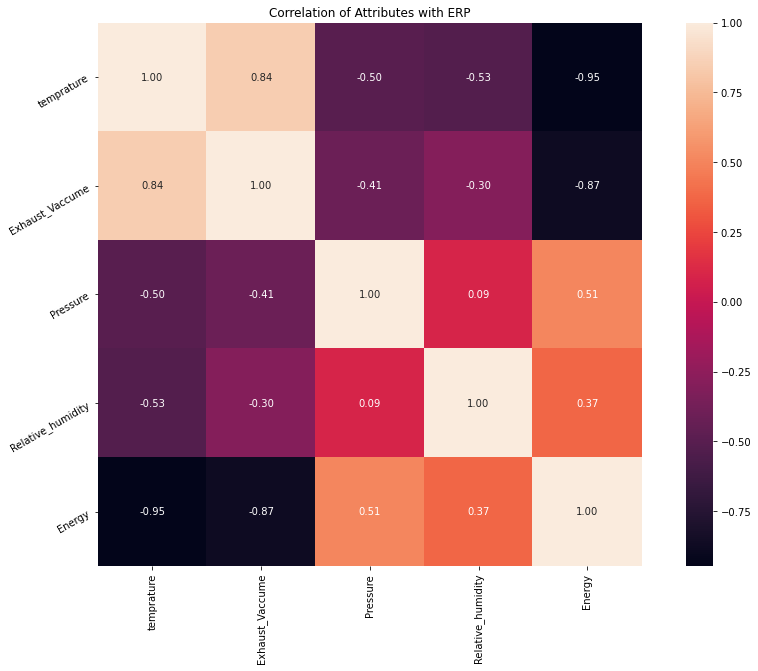

In [8]:
import seaborn as sns
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with ERP')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

# 10. Detect problems within variables

In [9]:
# let's visualise the number of missing values
df.isnull().sum()

temprature           0
Exhaust_Vaccume      0
Pressure             0
Relative_humidity    0
Energy               0
dtype: int64

In [10]:
# let's view the summary statistics of the dataset
df.describe()

,temprature,Exhaust_Vaccume,Pressure,Relative_humidity,Energy
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,256.010820,325.217580,92.111935,44.169640,1817.052860
std,95.188288,76.288073,0.539140,8.773132,66.594563
min,47.190000,152.160000,90.260000,15.530000,1700.560000
25%,175.695000,250.680000,91.730000,37.997500,1758.960000
50%,266.565000,307.800000,92.080000,45.160000,1808.400000
75%,334.880000,398.700000,92.482500,51.152500,1871.620000
max,455.390000,481.080000,93.890000,60.090000,1976.960000


# Outliers in discrete variables

In [11]:
# outlies in discrete variables

for var in ['temprature', 'Exhaust_Vaccume', 'Pressure', 'Relative_humidity']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

349.05    0.0025
353.34    0.0025
203.06    0.0025
328.90    0.0025
136.24    0.0020
           ...  
93.86     0.0005
381.42    0.0005
439.27    0.0005
259.61    0.0005
221.00    0.0005
Name: temprature, Length: 1410, dtype: float64

247.02    0.0070
247.56    0.0065
467.70    0.0055
275.22    0.0055
421.92    0.0055
           ...  
247.32    0.0005
244.80    0.0005
223.20    0.0005
240.42    0.0005
261.00    0.0005
Name: Exhaust_Vaccume, Length: 551, dtype: float64

91.80    0.0125
92.37    0.0115
91.95    0.0110
91.59    0.0105
91.83    0.0105
          ...  
93.08    0.0005
93.89    0.0005
92.97    0.0005
93.59    0.0005
91.00    0.0005
Name: Pressure, Length: 266, dtype: float64

49.85    0.0030
48.79    0.0030
60.05    0.0025
53.02    0.0025
52.40    0.0020
          ...  
57.57    0.0005
39.76    0.0005
48.92    0.0005
52.46    0.0005
54.25    0.0005
Name: Relative_humidity, Length: 1478, dtype: float64



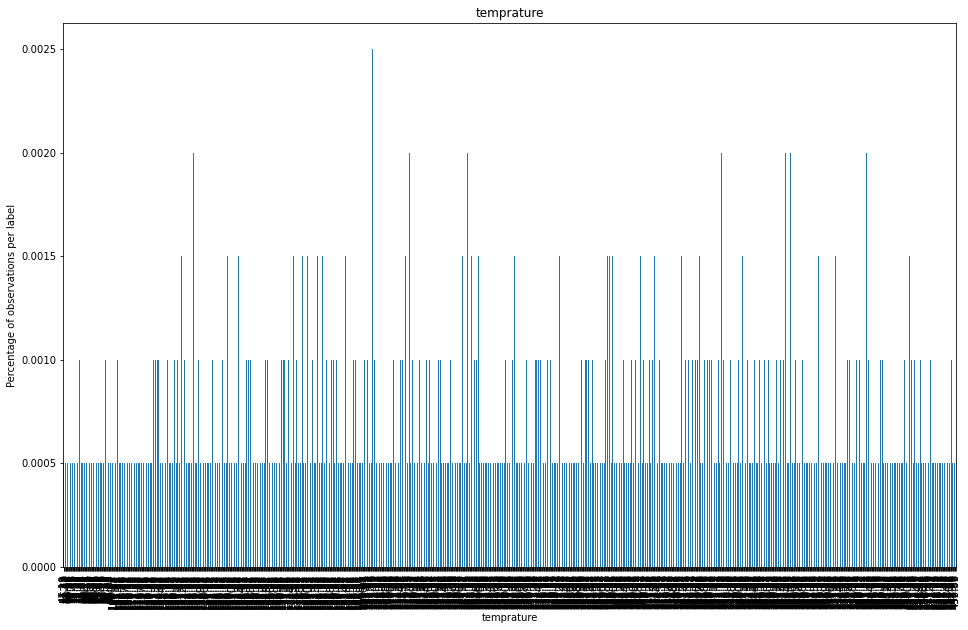

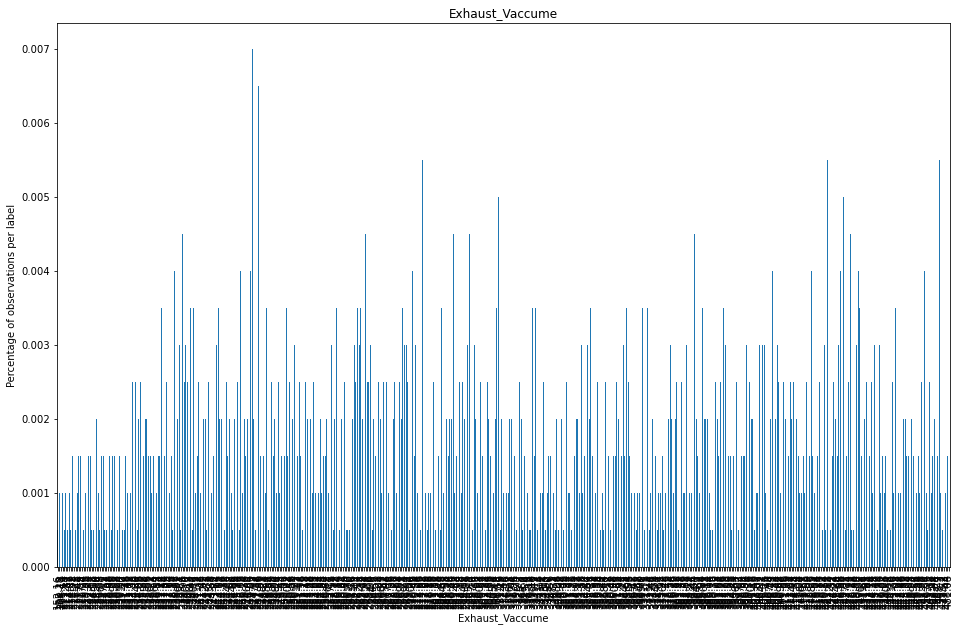

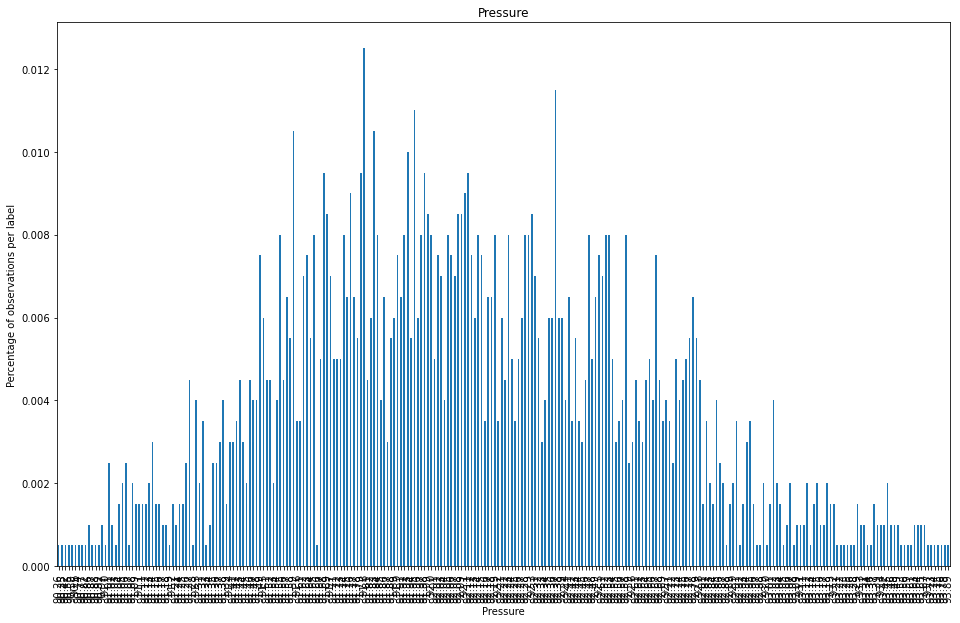

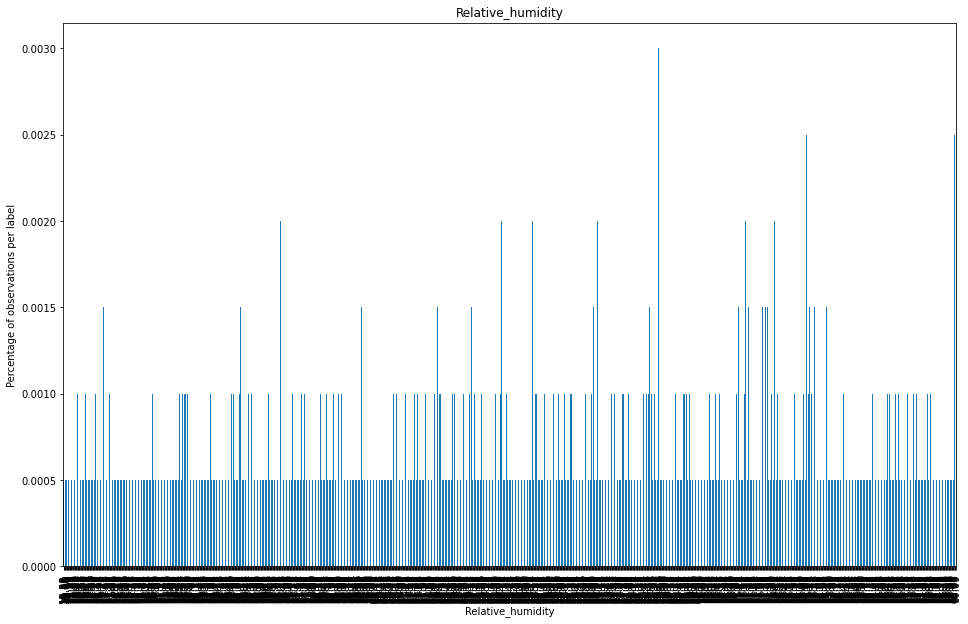

In [12]:
# detect outliers in discrete variables

for var in ['temprature', 'Exhaust_Vaccume', 'Pressure', 'Relative_humidity']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

# Linear Regression

Now, I discuss the most important part of this project which is the Linear Regression model building

# Select the predictor and target variables

In [13]:
x=df[['temprature', 'Exhaust_Vaccume', 'Pressure', 'Relative_humidity']]  # -->independent
y=df["Energy"]

# Create separate train and test sets

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

# View the dimensions of xtrain, xtest, ytrain, ytest

In [15]:
xtrain.shape, ytrain.shape

((1600, 4), (1600,))

In [16]:
xtest.shape, ytest.shape

((400, 4), (400,))

In [19]:
# let's inspect the training dataframe

xtrain.head()

,temprature,Exhaust_Vaccume,Pressure,Relative_humidity
945,98.93,236.52,93.18,44.86
428,330.85,343.92,91.97,28.25
680,139.62,240.30,92.31,52.40
1829,259.74,294.90,92.87,38.33
29,314.60,347.10,92.10,42.17


In [18]:
 # summary statistics of training dataframe
xtrain.describe()

,temprature,Exhaust_Vaccume,Pressure,Relative_humidity
count,1600.000000,1600.000000,1600.000000,1600.00000
mean,256.083181,325.479150,92.112300,44.06615
std,94.265529,76.489177,0.542217,8.76277
min,51.740000,152.160000,90.260000,15.53000
25%,178.067500,250.200000,91.730000,37.84000
50%,266.825000,308.580000,92.080000,45.14000
75%,335.367500,398.895000,92.482500,51.06500
max,447.590000,481.080000,93.890000,60.09000


# Feature Scaling

In [20]:
# Feature Scaling - I use the StandardScaler from sklearn

# import the StandardScaler class from preprocessing library
from sklearn.preprocessing import StandardScaler

# instantiate an object scaler
scaler = StandardScaler()

# fit the scaler to the training set and then transform it
xtrain = scaler.fit_transform(xtrain)

# transform the test set
xtest = scaler.transform(xtest)

# Fit the Linear Regression model

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(xtrain, ytrain)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(xtrain)
r2_score_linear_train = r2_score(ytrain, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(xtest)
r2_score_linear_test = r2_score(ytest, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(ytest, y_pred_linear_test)))

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

R2_score (train):  0.927189799892569
R2_score (test):  0.9333034832293371
RMSE:  17.594568709849124


# Polynomial Regression - 2nd degree

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(xtrain)
poly_reg.fit(X_poly, ytrain)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, ytrain)

LinearRegression()

In [23]:
from sklearn.metrics import r2_score

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(xtrain))
r2_score_poly2_train = r2_score(ytrain, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(xtest))
r2_score_poly2_test = r2_score(ytest, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(ytest, y_pred_poly2_test)))

print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

R2_score (train):  0.9366594506690137
R2_score (test):  0.9375152289494318
RMSE:  17.02998009242705


# Ridge Regression

In [24]:
from sklearn.linear_model import Ridge
Ridge_model=Ridge(alpha=0.3)
Ridge_model.fit(x,y)
print(Ridge_model.score(x,y))
print(Ridge_model.coef_)

0.928521885433699
[-0.59641326 -0.16244839  2.17870943 -1.02545293]


In [25]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=0.3, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(xtrain, ytrain)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=0.3))])

In [26]:
from sklearn.metrics import r2_score

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(xtrain)
r2_score_ridge_train = r2_score(ytrain, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(xtest)
r2_score_ridge_test = r2_score(ytest, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(ytest, y_pred_ridge_test)))
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

R2_score (train):  0.9366593177790374
R2_score (test):  0.9375081013577019
RMSE:  17.03095136336167


# Lasso Regression

In [27]:
from sklearn.linear_model import Lasso
Lasso_model=Lasso(alpha=0.1)
Lasso_model.fit(x,y)
print(Lasso_model.score(x,y))
print(Lasso_model.coef_)

0.9285110601555238
[-0.59852633 -0.16182738  1.69309556 -1.03187955]


In [28]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.1, fit_intercept=True,))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(xtrain, ytrain)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.1))])

In [29]:
from sklearn.metrics import r2_score

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(xtrain)
r2_score_lasso_train = r2_score(ytrain, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(xtest)
r2_score_lasso_test = r2_score(ytest, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(ytest, y_pred_lasso_test)))

print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

R2_score (train):  0.9365760004542159
R2_score (test):  0.9375829789906779
RMSE:  17.02074508399841


# Elastic Net Regression

In [30]:
from sklearn.linear_model import ElasticNet
ENet_model=ElasticNet(alpha=0.1,l1_ratio=0.5)
ENet_model.fit(x,y)
print(ENet_model.score(x,y))
print(ENet_model.coef_)

0.9285040904638135
[-0.59916143 -0.16164423  1.55514624 -1.03423388]


# Measuring the Error

In [31]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test.mean()),
        
         ]

In [32]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test)
0,Linear Regression,17.594569,0.927190,0.933303
1,Polynomial Regression (2nd),17.029980,0.936659,0.937515
2,Ridge Regression,17.030951,0.936659,0.937508
3,Lasso Regression,17.020745,0.936576,0.937583


# Predicting the results

I have built the linear regression model. Now it is time to predict the results

# Predicting the test set results

In [33]:
# Predict on the test data set
y_pred = regressor_linear.predict(xtest)

# Predicting estimated Electricity generated values

In [34]:
#print("Predicted ERP - estimated relative  values for the first five values")

regressor_linear.predict(xtest)[0:5]

array([1774.35789579, 1758.20634821, 1891.99105064, 1791.87745715,
       1849.87472158])

# Model slope and intercept terms

The slope parameters(w) are also called weights or coefficients. They are stored in the coef_ attribute.

The offset or intercept(b) is stored in the intercept_ attribute.

So, the model slope is given by regressor_linear.coef_ and model intercept term is given by regressor_linear.intercept_.

In [35]:
print("Number of coefficients:", len(regressor_linear.coef_))

print("Estimated coefficients: {}".format(regressor_linear.coef_))

print("Estimated intercept: {}".format(regressor_linear.intercept_))

Number of coefficients: 4
Estimated coefficients: [-55.68567779 -12.98977971   0.92161015  -8.76787292]
Estimated intercept: 1817.28455


I constructed a dataframe that contains features and estimated coefficients.

In [36]:
dataset = list(zip(pd.DataFrame(xtrain).columns, regressor_linear.coef_))

pd.DataFrame(data = dataset, columns = ['Features', 'Estimated Coefficients']).set_index('Features')

,Estimated Coefficients
Features,
0,-55.685678
1,-12.989780
2,0.921610
3,-8.767873


# Evaluate model performance

I have built the linear regression model and use it to predict the results. Now, it is the time to evaluate the model performance. We want to understand the outcome of our model and we want to know whether the performance is acceptable or not. For regression problems, there are several ways to evaluate the model performance. These are listed below:-

• RMSE (Root Mean Square Error)

• R2 Score

• Overfitting Vs Underfitting

• Cross validation

• Residual analysis

• Normality test

I have described these measures in following sections:-

# i. RMSE

RMSE stands for Root Mean Square Error. RMSE is the standard deviation of the residuals. RMSE gives us the standard deviation of the unexplained variance by the model. It can be calculated by taking square root of Mean Squared Error.

RMSE is an absolute measure of fit. It gives us how spread the residuals are, given by the standard deviation of the residuals. The more concentrated the data is around the regression line, the lower the residuals and hence lower the standard deviation of residuals. It results in lower values of RMSE. So, lower values of RMSE indicate better fit of data.

RMSE can be calculated as follows:-

In [37]:
# RMSE(Root Mean Square Error)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
print("RMSE value : {:.2f}".format(rmse))

RMSE value : 17.59


Interpretation The RMSE value has been found to be 17.59. It means the standard deviation for our prediction is 17.59. So, sometimes we expect the predictions to be off by more than 17.59 and other times we expect less than 17.59

# ii. R2 Score

R2 Score is another metric to evaluate performance of a regression model. It is also called Coefficient of Determination. It gives us an idea of goodness of fit for the linear regression models. It indicates the percentage of variance that is explained by the model.

R2 Score = Explained Variation/Total Variation

Mathematically, we have

𝑅2=1−𝑆𝑆𝑟𝑒𝑠𝑆𝑆𝑡𝑜𝑡

The total sum of squares, 𝑆𝑆𝑡𝑜𝑡=∑𝑖(𝑦𝑖−𝑦¯)2 The regression sum of squares (explained sum of squares), 𝑆𝑆𝑟𝑒𝑔=∑𝑖(𝑓𝑖−𝑦¯)2 The sum of squares of residuals (residual sum of squares), 𝑆𝑆𝑟𝑒𝑠=∑𝑖(𝑦𝑖−𝑓𝑖)2=∑𝑖𝑒2𝑖 In general, the higher the R2 Score value, the better the model fits the data. Usually, its value ranges from 0 to 1. So, we want its value to be as close to 1. Its value can become negative if our model is wrong.

R2 score value can be found as follows:-

In [38]:
# R2 Score

from sklearn.metrics import r2_score
print("R2 Score value: {:.2f}".format(r2_score(ytest, y_pred)))

R2 Score value: 0.93


# Interpretation

In business decisions, the benchmark for the R2 score value is 0.7. It means if R2 score value >= 0.7, then the model is good enough to deploy on unseen data whereas if R2 score value < 0.7, then the model is not good enough to deploy.

Our R2 score value has been found to be 0.93. It means that this model explains 93% of the variance in our dependent variable. So, the R2 score value confirms that the model is good enough to deploy because it provides good fit to the data

# Overfitting Vs Underfitting

In [39]:
# Evaluating training set performance

print("Training set score: {:.2f}".format( regressor_linear.score(xtrain, ytrain)))

Training set score: 0.93


In [40]:
# Evaluating test set performance

print("Test set score: {:.2f}".format( regressor_linear.score(xtest, ytest)))

Test set score: 0.93


# Interpretation

Training set and test set performances are comparable. An R Square value of 0.93 is very good.

# Visualizing Models Performance

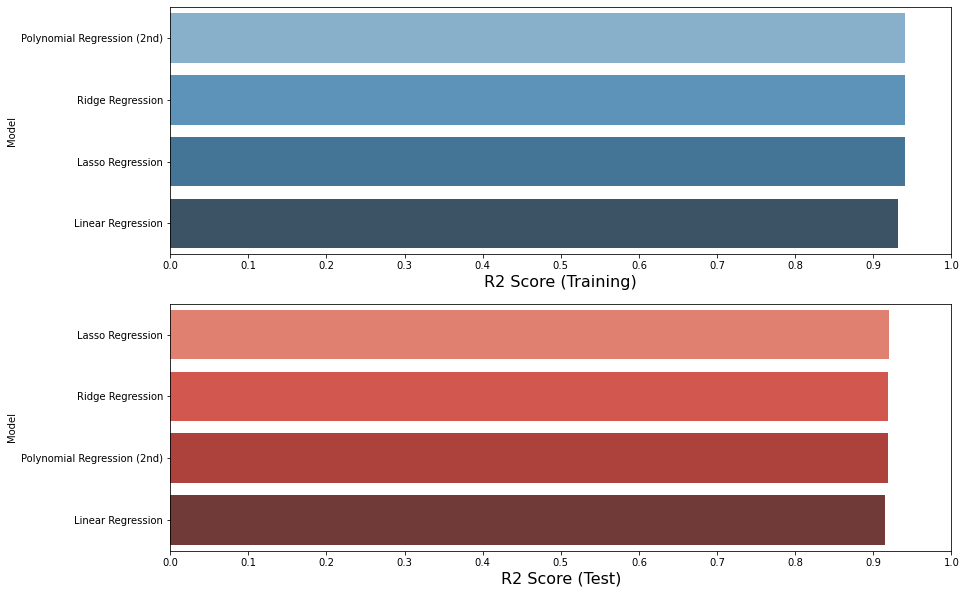

In [32]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

# Conclusion

We fitted the model using Linear Regression, Polynomial Regression(2nd order), Ridge Regression, Lasso Regression having R_square values 0.9271, 0.9366, 0.9366, 0.9365 respectively. 
The Maximum accuracy are attained by Polynomial, Ridge, Lasso Regression.